<a href="https://colab.research.google.com/github/tul17ii/KNN-in-ML/blob/main/KNNblah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving knn_example_dataset.csv to knn_example_dataset.csv

📊 Loaded Dataset:
    X1 (Durability)  X2 (Strength) Category (Y)
0                7              7          Bad
1                7              4          Bad
2                3              4         Good
3                1              4         Good

🧼 Handling Missing Values (Mean Imputation)
Before:
 X1    0
X2    0
Y     0
dtype: int64
After:
 X1    0
X2    0
Y     0
dtype: int64

🚨 Outlier Detection (Z-score > 3 replaced with median)

📈 Correlation Matrix:
          X1        X2
X1  1.000000  0.555556
X2  0.555556  1.000000

📌 Query Point: (3, 7)

📏 Non-Rooted Euclidean Distances:
Point (7,7) → Distance² = 16
Point (7,4) → Distance² = 25
Point (3,4) → Distance² = 9
Point (1,4) → Distance² = 13

📏 Sorted Distances (ascending):
Distance² = 9, Label = Good
Distance² = 13, Label = Good
Distance² = 16, Label = Bad
Distance² = 25, Label = Bad

🏅 Top 3 Nearest Neighbors:
Distance² = 9, Label = Good
Distance² = 13, Label = Good

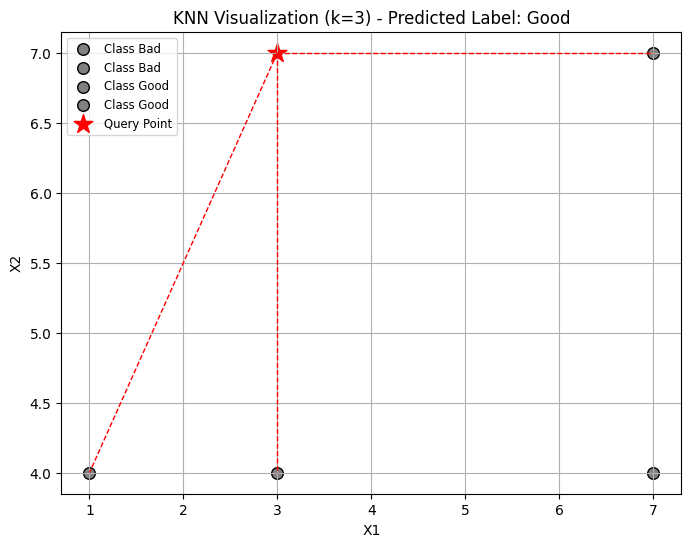

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy.stats import zscore
import matplotlib.pyplot as plt
from google.colab import files  # Remove this line if using Jupyter

# ==== Step 1: Upload CSV ====
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)

print("\n📊 Loaded Dataset:\n", df)

# Rename for consistency
df.columns = ['X1', 'X2', 'Y']  # Assumes 2 features + 1 label

# ==== Step 2: Handle Missing Values (Univariate Mean Imputation) ====
print("\n🧼 Handling Missing Values (Mean Imputation)")
missing_before = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_after = df.isnull().sum()
print("Before:\n", missing_before)
print("After:\n", missing_after)

# ==== Step 3: Outlier Handling (Z-Score Method) ====
print("\n🚨 Outlier Detection (Z-score > 3 replaced with median)")
cols = ['X1', 'X2']
z_scores = zscore(df[cols])  # <-- FIXED LINE

for i, col in enumerate(cols):
    outliers = np.abs(z_scores[:, i]) > 3
    if outliers.any():
        print(f"Outliers in {col}: {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()

# ==== Step 4: Correlation Matrix ====
print("\n📈 Correlation Matrix:")
print(df[['X1', 'X2']].corr())

# ==== Step 5: Manual KNN ====
query_point = (3, 7)
k = 3
distances = []

print(f"\n📌 Query Point: {query_point}")
print("\n📏 Non-Rooted Euclidean Distances:")

for index, row in df.iterrows():
    x1 = row['X1']
    x2 = row['X2']
    label = row['Y']
    dist_sq = (x1 - query_point[0]) ** 2 + (x2 - query_point[1]) ** 2
    distances.append((dist_sq, label))
    print(f"Point ({x1},{x2}) → Distance² = {dist_sq}")

# Sort distances
sorted_distances = sorted(distances, key=lambda x: x[0])

print("\n📏 Sorted Distances (ascending):")
for dist, label in sorted_distances:
    print(f"Distance² = {dist}, Label = {label}")

# Top-k neighbors
top_k = sorted_distances[:k]
print(f"\n🏅 Top {k} Nearest Neighbors:")
for dist, label in top_k:
    print(f"Distance² = {dist}, Label = {label}")

# Voting
vote_count = {}
for dist, label in top_k:
    vote_count[label] = vote_count.get(label, 0) + 1

print("\n📊 Vote Count:")
for label in vote_count:
    print(f"{label}: {vote_count[label]}")

# Final prediction
predicted_label = max(vote_count, key=vote_count.get)
print(f"\n✅ Final Predicted Label for {query_point}: {predicted_label}")
# ==== Step 6: Plotting ====
colors = {1: 'green', 0: 'orange', 'Other': 'gray'}  # Assuming Y is numeric (0 or 1)

plt.figure(figsize=(8, 6))

# Plot all data points
for _, row in df.iterrows():
    plt.scatter(row['X1'], row['X2'], c=colors.get(row['Y'], 'gray'),
                s=70, edgecolor='black', label=f"Class {row['Y']}")

# Plot query point
plt.scatter(query_point[0], query_point[1], c='red', marker='*', s=200, label='Query Point')

# Draw lines to top-k neighbors
for dist_sq, label in top_k:
    # Find the matching point in df
    for _, row in df.iterrows():
        if (row['X1'] - query_point[0])**2 + (row['X2'] - query_point[1])**2 == dist_sq:
            plt.plot([query_point[0], row['X1']], [query_point[1], row['X2']], 'r--', linewidth=1)
            break

# Labeling
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"KNN Visualization (k={k}) - Predicted Label: {predicted_label}")
plt.grid(True)
plt.legend(loc='best', fontsize='small')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Step 1: Load Data

df = pd.read_csv("weather_dataset.csv")
print("Step 1: Loaded Data from CSV (All Rows)\n", df.to_string(index=False))


# Step 2a: Handle Missing Values (Univariate)
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(method='ffill', inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)

# Step 2a (Bivariate Check - Simulated on 'Humidity')
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
if df['Humidity'].isnull().sum() > 0:
    group_missing = df[df['Humidity'].isnull()].groupby(['Outlook', 'Temperature']).size().unstack(fill_value=0)
    print("Conditional missing count of 'Humidity':\n", group_missing)
else:
    print("No missing values in 'Humidity'")
# Step 2b: Outlier Detection (on numeric values)
from scipy.stats import zscore
print("\nStep 2b: Outlier Detection with Z-score")
df_encoded = df.copy()

# Encode categorical for Z-score
le_temp = LabelEncoder()
le_humid = LabelEncoder()
df_encoded['Temp_enc'] = le_temp.fit_transform(df_encoded['Temperature'])
df_encoded['Hum_enc'] = le_humid.fit_transform(df_encoded['Humidity'])

z_scores = np.abs(zscore(df_encoded[['Temp_enc', 'Hum_enc']]))
for i, col in enumerate(['Temp_enc', 'Hum_enc']):
    outliers = z_scores[:, i] > 3
    if outliers.any():
        print(f"Outliers in {col}: {np.where(outliers)[0].tolist()}")
        df_encoded.loc[outliers, col] = df_encoded[col].median()
    else:
        print(f"No outliers in {col}")
# Step 2c: Scaling and Normalization
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")

# Convert categorical features for modeling
df_model = df.copy()
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humid = LabelEncoder()
le_windy = LabelEncoder()
le_play = LabelEncoder()

df_model['Outlook'] = le_outlook.fit_transform(df_model['Outlook'])
df_model['Temperature'] = le_temp.fit_transform(df_model['Temperature'])
df_model['Humidity'] = le_humid.fit_transform(df_model['Humidity'])
df_model['Windy'] = le_windy.fit_transform(df_model['Windy'])
df_model['Play'] = le_play.fit_transform(df_model['Play'])

X = df_model[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df_model['Play']

# Scaling
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

minmax = MinMaxScaler()
X_mm = minmax.fit_transform(X)
pt = PowerTransformer()
X_pt = pt.fit_transform(X)

# Add back to DataFrame
df_scaled = pd.DataFrame(X, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])
df_scaled[['Outlook_std', 'Temp_std', 'Humid_std', 'Windy_std']] = X_std
df_scaled[['Outlook_mm', 'Temp_mm', 'Humid_mm', 'Windy_mm']] = X_mm
df_scaled[['Outlook_pt', 'Temp_pt', 'Humid_pt', 'Windy_pt']] = X_pt

print(df_scaled.head())
# Step 3: Correlation Matrix
print("\nStep 3: Bivariate Correlation Matrix")
correlation = df_model.corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
# Step 4: Naive Bayes Classification
print("\nStep 4: Naive Bayes Classification")

model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=le_play.classes_))# Step 5: Confusion Matrix Plot
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_play.classes_, yticklabels=le_play.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()# Step 6: Final Result Table
result_df = df.copy()
result_df["Predicted_Play"] = le_play.inverse_transform(y_pred)

print("\nFinal Result Table:\n")
print(result_df[['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play', 'Predicted_Play']].to_string(index=False))

Saving weather_dataset.csv to weather_dataset (3).csv
Step 1: Loaded Data from CSV (All Rows)
  Outlook Temperature Humidity  Windy Play
   sunny         hot     high  False   NO
   sunny         hot     high   True   NO
overcast         hot     high  False  YES
   rainy        mild     high  False  YES
   rainy        cool   normal  False  YES
   rainy        cool   normal   True   NO
overcast        cool   normal   True  YES
   sunny        mild     high  False   NO
   sunny        cool   normal  False  YES
   rainy        mild   normal  False  YES
   sunny        mild   normal   True  YES
overcast        mild     high   True  YES
overcast         hot   normal  False  YES
   rainy        mild     high   True   NO

Step 2a: Handling Missing Values (Univariate)
Missing values before:
 Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64
Missing values after:
 Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           

/tmp/ipython-input-276133926.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


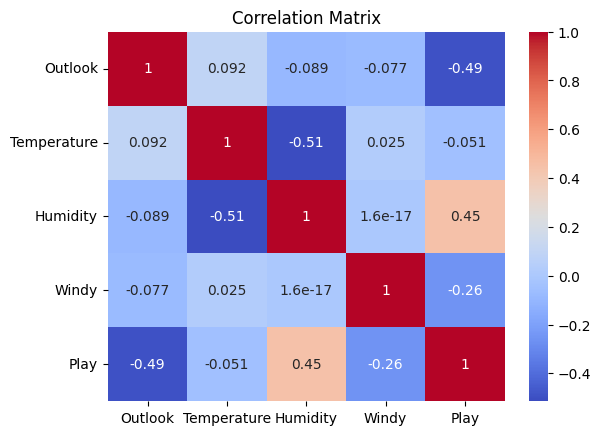


Step 4: Naive Bayes Classification

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

          NO       1.00      0.80      0.89         5
         YES       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



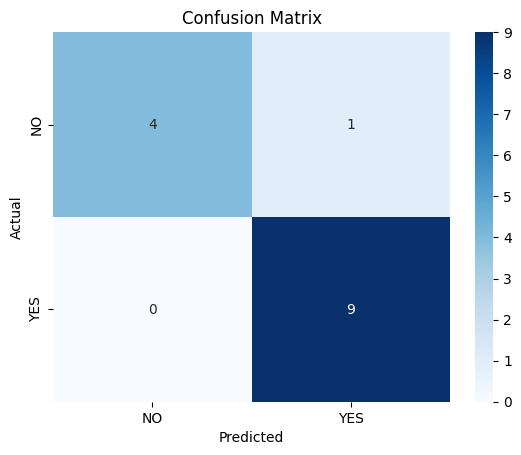


Final Result Table:

 Outlook Temperature Humidity  Windy Play Predicted_Play
   sunny         hot     high  False   NO             NO
   sunny         hot     high   True   NO             NO
overcast         hot     high  False  YES            YES
   rainy        mild     high  False  YES            YES
   rainy        cool   normal  False  YES            YES
   rainy        cool   normal   True   NO            YES
overcast        cool   normal   True  YES            YES
   sunny        mild     high  False   NO             NO
   sunny        cool   normal  False  YES            YES
   rainy        mild   normal  False  YES            YES
   sunny        mild   normal   True  YES            YES
overcast        mild     high   True  YES            YES
overcast         hot   normal  False  YES            YES
   rainy        mild     high   True   NO             NO


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Step 1: Load Data

df = pd.read_csv("weather_dataset.csv")
print("Step 1: Loaded Data from CSV (All Rows)\n", df.to_string(index=False))


# Step 2a: Handle Missing Values (Univariate)
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(method='ffill', inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)

# Step 2a (Bivariate Check - Simulated on 'Humidity')
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
if df['Humidity'].isnull().sum() > 0:
    group_missing = df[df['Humidity'].isnull()].groupby(['Outlook', 'Temperature']).size().unstack(fill_value=0)
    print("Conditional missing count of 'Humidity':\n", group_missing)
else:
    print("No missing values in 'Humidity'")
# Step 2b: Outlier Detection (on numeric values)
from scipy.stats import zscore
print("\nStep 2b: Outlier Detection with Z-score")
df_encoded = df.copy()

# Encode categorical for Z-score
le_temp = LabelEncoder()
le_humid = LabelEncoder()
df_encoded['Temp_enc'] = le_temp.fit_transform(df_encoded['Temperature'])
df_encoded['Hum_enc'] = le_humid.fit_transform(df_encoded['Humidity'])

z_scores = np.abs(zscore(df_encoded[['Temp_enc', 'Hum_enc']]))
for i, col in enumerate(['Temp_enc', 'Hum_enc']):
    outliers = z_scores[:, i] > 3
    if outliers.any():
        print(f"Outliers in {col}: {np.where(outliers)[0].tolist()}")
        df_encoded.loc[outliers, col] = df_encoded[col].median()
    else:
        print(f"No outliers in {col}")
# Step 2c: Scaling and Normalization
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")

# Convert categorical features for modeling
df_model = df.copy()
le_outlook = LabelEncoder()
le_temp = LabelEncoder()
le_humid = LabelEncoder()
le_windy = LabelEncoder()
le_play = LabelEncoder()

df_model['Outlook'] = le_outlook.fit_transform(df_model['Outlook'])
df_model['Temperature'] = le_temp.fit_transform(df_model['Temperature'])
df_model['Humidity'] = le_humid.fit_transform(df_model['Humidity'])
df_model['Windy'] = le_windy.fit_transform(df_model['Windy'])
df_model['Play'] = le_play.fit_transform(df_model['Play'])

X = df_model[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = df_model['Play']

# Scaling
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

minmax = MinMaxScaler()
X_mm = minmax.fit_transform(X)
pt = PowerTransformer()
X_pt = pt.fit_transform(X)

# Add back to DataFrame
df_scaled = pd.DataFrame(X, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])
df_scaled[['Outlook_std', 'Temp_std', 'Humid_std', 'Windy_std']] = X_std
df_scaled[['Outlook_mm', 'Temp_mm', 'Humid_mm', 'Windy_mm']] = X_mm
df_scaled[['Outlook_pt', 'Temp_pt', 'Humid_pt', 'Windy_pt']] = X_pt

print(df_scaled.head())
# Step 3: Correlation Matrix
print("\nStep 3: Bivariate Correlation Matrix")
correlation = df_model.corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
# Step 4: Naive Bayes Classification
print("\nStep 4: Naive Bayes Classification")

model = GaussianNB()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=le_play.classes_))# Step 5: Confusion Matrix Plot
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_play.classes_, yticklabels=le_play.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()# Step 6: Final Result Table
result_df = df.copy()
result_df["Predicted_Play"] = le_play.inverse_transform(y_pred)

print("\nFinal Result Table:\n")
print(result_df[['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play', 'Predicted_Play']].to_string(index=False))

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer
from IPython.display import display

# ------------------ Step 1: Load CSV ------------------
df = pd.read_csv("medicine_picture_data.csv")
print("Step 1: Loaded Data")
display(df)

# ------------------ Step 2a: Handle Missing Values ------------------
print("\nStep 2a: Missing Value Check")
print("Before:\n", df.isnull().sum())
df.ffill(inplace=True)
print("After:\n", df.isnull().sum())

# ------------------ Step 2b: Outlier Detection ------------------
print("\nStep 2b: Outlier Detection")
for col in ['Weight Index', 'pH']:
    z = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers = df[z > 3].index.tolist()
    print(f"Outliers in {col}:", outliers)
    if outliers:
        df.loc[z > 3, col] = df[col].median()

# ------------------ Step 2c: Power Transform ------------------
print("\nStep 2c: Power Transform")
pt = PowerTransformer()
scaled = pt.fit_transform(df[['Weight Index', 'pH']])
df[['Weight_Scaled', 'pH_Scaled']] = scaled
display(df)

# ------------------ Step 3: K-Means (Manual) ------------------
# Initialize data
X = df[['Weight Index', 'pH']].values
C1 = [1, 1]
C2 = [2, 1]
centroids = [C1, C2]

def euclidean(p1, p2):
    return ((p1[0] - p2[0])*2 + (p1[1] - p2[1])*2) * 0.5


def compute_centroid(group):
    if not group:
        return [0, 0]
    x = sum([p[0] for p in group]) / len(group)
    y = sum([p[1] for p in group]) / len(group)
    return [x, y]

iteration = 0
previous_assignments = None
iteration_results = []

while True:
    iteration += 1
    distances_c1 = [euclidean(p, centroids[0]) for p in X]
    distances_c2 = [euclidean(p, centroids[1]) for p in X]
    current_assignments = [0 if d1 <= d2 else 1 for d1, d2 in zip(distances_c1, distances_c2)]

    df_iter = df.copy()
    df_iter['Dist_to_C1'] = distances_c1
    df_iter['Dist_to_C2'] = distances_c2
    df_iter['Group'] = ['G1' if g == 0 else 'G2' for g in current_assignments]
    df_iter['Centroid_C1'] = str(tuple(round(x, 2) for x in centroids[0]))
    df_iter['Centroid_C2'] = str(tuple(round(x, 2) for x in centroids[1]))
    df_iter['Iteration'] = iteration
    iteration_results.append(df_iter)

    if current_assignments == previous_assignments:
        print(f"\n✅ Converged at Iteration {iteration}")
        break

    # Update centroids
    group1 = [X[i] for i in range(len(X)) if current_assignments[i] == 0]
    group2 = [X[i] for i in range(len(X)) if current_assignments[i] == 1]
    centroids[0] = compute_centroid(group1)
    centroids[1] = compute_centroid(group2)
    previous_assignments = current_assignments

# ------------------ Final Display ------------------
final_df = pd.concat(iteration_results, ignore_index=True)
print("\n📊 Final K-Means Output (All Iterations):")
display(final_df)

Saving medicine_picture_data.csv to medicine_picture_data.csv
Step 1: Loaded Data


,Object,Weight Index,pH
0,Medicine A,1,1
1,Medicine B,2,1
2,Medicine C,4,3
3,Medicine D,5,4



Step 2a: Missing Value Check
Before:
 Object          0
Weight Index    0
pH              0
dtype: int64
After:
 Object          0
Weight Index    0
pH              0
dtype: int64

Step 2b: Outlier Detection
Outliers in Weight Index: []
Outliers in pH: []

Step 2c: Power Transform


,Object,Weight Index,pH,Weight_Scaled,pH_Scaled
0,Medicine A,1,1,-1.332626,-0.985567
1,Medicine B,2,1,-0.554140,-0.985567
2,Medicine C,4,3,0.681571,0.746163
3,Medicine D,5,4,1.205196,1.224972



✅ Converged at Iteration 2

📊 Final K-Means Output (All Iterations):


,Object,Weight Index,pH,Weight_Scaled,pH_Scaled,Dist_to_C1,Dist_to_C2,Group,Centroid_C1,Centroid_C2,Iteration
0,Medicine A,1,1,-1.332626,-0.985567,0.0,-1.00,G2,"(1, 1)","(2, 1)",1
1,Medicine B,2,1,-0.554140,-0.985567,1.0,0.00,G2,"(1, 1)","(2, 1)",1
2,Medicine C,4,3,0.681571,0.746163,5.0,4.00,G2,"(1, 1)","(2, 1)",1
3,Medicine D,5,4,1.205196,1.224972,7.0,6.00,G2,"(1, 1)","(2, 1)",1
4,Medicine A,1,1,-1.332626,-0.985567,2.0,-3.25,G2,"(0, 0)","(np.float64(3.0), np.float64(2.25))",2
5,Medicine B,2,1,-0.554140,-0.985567,3.0,-2.25,G2,"(0, 0)","(np.float64(3.0), np.float64(2.25))",2
6,Medicine C,4,3,0.681571,0.746163,7.0,1.75,G2,"(0, 0)","(np.float64(3.0), np.float64(2.25))",2
7,Medicine D,5,4,1.205196,1.224972,9.0,3.75,G2,"(0, 0)","(np.float64(3.0), np.float64(2.25))",2


In [ ]:
# === STEP 0: Imports and Upload ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from google.colab import files


files.upload()


# === STEP 1: Load CSV Dataset ===
df = pd.read_csv("weather_dataset.csv")


# === STEP 2a: Handle Missing Values (Univariate) ===
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)


# === STEP 2a: Bivariate Missing Value Check (Simulated) ===
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
group_missing = df[df['x2'].isnull()].groupby(['x1', 'label']).size().unstack(fill_value=0)
print("Conditional missing count of 'x2':")
print(group_missing)


# === STEP 2b: Outlier Detection and Handling (Z-Score) ===
print("\nStep 2b: Outlier Detection with Z-score (Univariate)")
columns_to_check = ['x1', 'x2', 'label']
z_scores_np = np.abs(zscore(df[columns_to_check]))


for i, col in enumerate(columns_to_check):
    outliers = z_scores_np[:, i] > 3
    if outliers.any():
        print(f"Outliers detected in {col} at rows: {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()
    else:
        print(f"No significant outliers found in {col}.")


# === STEP 2c: Scaling and Transformation ===
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")


scaler = StandardScaler()
std_scaled = scaler.fit_transform(df[columns_to_check])
df[['x1_std', 'x2_std', 'label_std']] = std_scaled


minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df[columns_to_check])
df[['x1_mm', 'x2_mm', 'label_mm']] = mm_scaled


pt = PowerTransformer()
pt_scaled = pt.fit_transform(df[columns_to_check])
df[['x1_pt', 'x2_pt', 'label_pt']] = pt_scaled


df_preview = df[['x1', 'x2', 'label',
                 'x1_std', 'x2_std', 'label_std',
                 'x1_mm', 'x2_mm', 'label_mm',
                 'x1_pt', 'x2_pt', 'label_pt']]


df_preview.head(10)


# === STEP 3: Class Separation and Plot ===
df["label"] = df["label"].astype(int)
blue_class = df[df["label"] == -1][["x1", "x2"]].values
red_class  = df[df["label"] == 1][["x1", "x2"]].values
X = np.vstack((blue_class, red_class))
y = np.array([0]*len(blue_class) + [1]*len(red_class))


plt.figure(figsize=(6,6))
plt.scatter(blue_class[:, 0], blue_class[:, 1], c='blue', label='Blue Class (-1)')
plt.scatter(red_class[:, 0], red_class[:, 1], c='red', marker='s', label='Red Class (1)')
plt.title("Original Data (After Preprocessing, Before φ Mapping)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


# === STEP 4: φ (Phi) Transformation ===
def phi_transform(x):
    x1, x2 = x
    if np.sqrt(x1*2 + x2*2) >= 2:
        return np.array([6 - x1 + (x1 - x2)*2, 6 - x2 + (x1 - x2)*2])
    else:
        return np.array([x1, x2])


X_transformed = np.array([phi_transform(point) for point in X])
blue_trans = X_transformed[y == 0]
red_trans  = X_transformed[y == 1]


print("Transformed Coordinates for Blue Class (Label 0):")
print(blue_trans)
print("\nTransformed Coordinates for Red Class (Label 1):")
print(red_trans)


plt.figure(figsize=(6,6))
plt.scatter(blue_trans[:, 0], blue_trans[:, 1], c='blue', label='Transformed Blue Class (0)')
plt.scatter(red_trans[:, 0], red_trans[:, 1], c='red', marker='s', label='Transformed Red Class (1)')
plt.title("Transformed Data (After φ Mapping)")
plt.xlabel("Φ(x1)")
plt.ylabel("Φ(x2)")
plt.legend()
plt.grid(True)
plt.show()


# === STEP 5: Select Support Vectors ===
S1 = np.append(red_trans[0], 1)
S2 = np.append(red_trans[1], 1)
S3 = np.append(blue_trans[0], 1)
support_vectors = [S1, S2, S3]


A = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        A[i][j] = np.dot(support_vectors[i], support_vectors[j])


print("=== A Matrix (from φ-transformed support vectors) ===")
for i in range(3):
    for j in range(3):
        print(f"A[{i+1}][{j+1}] = S{i+1} · S{j+1} = {A[i][j]:.4f}")


B = np.array([1, 1, -1])


def gauss_elimination(A, B):
    A = A.astype(float)
    B = B.astype(float)
    n = len(B)


    for i in range(n):
        max_row = i + np.argmax(np.abs(A[i:, i]))
        A[[i, max_row]] = A[[max_row, i]]
        B[[i, max_row]] = B[[max_row, i]]


        pivot = A[i, i]
        A[i] = A[i] / pivot
        B[i] = B[i] / pivot


        for j in range(i+1, n):
            factor = A[j, i]
            A[j] = A[j] - factor * A[i]
            B[j] = B[j] - factor * B[i]


    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = B[i] - np.dot(A[i, i+1:], x[i+1:])
    return x


alphas = gauss_elimination(A.copy(), B.copy())
alpha1, alpha2, alpha3 = alphas
print(f"\nAlpha values:\nα1 = {alpha1:.4f}, α2 = {alpha2:.4f}, α3 = {alpha3:.4f}")


# === STEP 6: Compute w_tilde, w, b ===
w_tilde = alpha1 * S1 + alpha2 * S2 + alpha3 * S3
w_manual = w_tilde[:2]
b_manual = w_tilde[2]


print(f"\nCalculated augmented weight vector w_tilde = {w_tilde}")
print(f"Weight vector w = [{w_manual[0]:.4f}, {w_manual[1]:.4f}]")
print(f"Bias b = {b_manual:.4f}")


# === STEP 7: Plot Decision Boundary and Margins ===
plt.figure(figsize=(8,8))
plt.scatter(blue_trans[:, 0], blue_trans[:, 1], c='blue', label='Transformed Blue Class')
plt.scatter(red_trans[:, 0], red_trans[:, 1], c='red', marker='s', label='Transformed Red Class')


x_vals = np.linspace(0, 12, 100)


if w_manual[1] != 0:
    y_vals = -(w_manual[0] * x_vals + b_manual) / w_manual[1]
    y_vals_margin_pos = (-w_manual[0] * x_vals - b_manual + 1) / w_manual[1]
    y_vals_margin_neg = (-w_manual[0] * x_vals - b_manual - 1) / w_manual[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    plt.plot(x_vals, y_vals_margin_pos, 'g:', label='Margin (y=+1)')
    plt.plot(x_vals, y_vals_margin_neg, 'm:', label='Margin (y=-1)')
else:
    x_boundary = -b_manual / w_manual[0]
    plt.axvline(x=x_boundary, color='k', linestyle='--', label='Decision Boundary')
    plt.axvline(x=(1 - b_manual) / w_manual[0], color='g', linestyle=':', label='Margin (y=+1)')
    plt.axvline(x=(-1 - b_manual) / w_manual[0], color='m', linestyle=':', label='Margin (y=-1)')


plt.title("Margin / Decision Boundary in Transformed Space")
plt.xlabel("Φ(x1)")
plt.ylabel("Φ(x2)")
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.legend()
plt.grid(True)
plt.show()

Saving weather_dataset.csv to weather_dataset (2).csv

Step 2a: Handling Missing Values (Univariate)
Missing values before:
 Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64
Missing values after:
 Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

Step 2a: Bivariate Missing Value Check (Simulated)


KeyError: 'x2'

In [ ]:
# === STEP 0: Imports and Upload ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from google.colab import files


files.upload()


# === STEP 1: Load CSV Dataset ===
df = pd.read_csv("non_linear_svm_dataset.csv")


# === STEP 2a: Handle Missing Values (Univariate) ===
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)


# === STEP 2a: Bivariate Missing Value Check (Simulated) ===
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
group_missing = df[df['x2'].isnull()].groupby(['x1', 'label']).size().unstack(fill_value=0)
print("Conditional missing count of 'x2':")
print(group_missing)


# === STEP 2b: Outlier Detection and Handling (Z-Score) ===
print("\nStep 2b: Outlier Detection with Z-score (Univariate)")
columns_to_check = ['x1', 'x2', 'label']
z_scores_np = np.abs(zscore(df[columns_to_check]))


for i, col in enumerate(columns_to_check):
    outliers = z_scores_np[:, i] > 3
    if outliers.any():
        print(f"Outliers detected in {col} at rows: {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()
    else:
        print(f"No significant outliers found in {col}.")


# === STEP 2c: Scaling and Transformation ===
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")


scaler = StandardScaler()
std_scaled = scaler.fit_transform(df[columns_to_check])
df[['x1_std', 'x2_std', 'label_std']] = std_scaled


minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df[columns_to_check])
df[['x1_mm', 'x2_mm', 'label_mm']] = mm_scaled


pt = PowerTransformer()
pt_scaled = pt.fit_transform(df[columns_to_check])
df[['x1_pt', 'x2_pt', 'label_pt']] = pt_scaled


df_preview = df[['x1', 'x2', 'label',
                 'x1_std', 'x2_std', 'label_std',
                 'x1_mm', 'x2_mm', 'label_mm',
                 'x1_pt', 'x2_pt', 'label_pt']]


df_preview.head(10)


# === STEP 3: Class Separation and Plot ===
df["label"] = df["label"].astype(int)
blue_class = df[df["label"] == -1][["x1", "x2"]].values
red_class  = df[df["label"] == 1][["x1", "x2"]].values
X = np.vstack((blue_class, red_class))
y = np.array([0]*len(blue_class) + [1]*len(red_class))


plt.figure(figsize=(6,6))
plt.scatter(blue_class[:, 0], blue_class[:, 1], c='blue', label='Blue Class (-1)')
plt.scatter(red_class[:, 0], red_class[:, 1], c='red', marker='s', label='Red Class (1)')
plt.title("Original Data (After Preprocessing, Before φ Mapping)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


# === STEP 4: φ (Phi) Transformation ===
def phi_transform(x):
    x1, x2 = x
    if np.sqrt(x1*2 + x2*2) >= 2:
        return np.array([6 - x1 + (x1 - x2)*2, 6 - x2 + (x1 - x2)*2])
    else:
        return np.array([x1, x2])


X_transformed = np.array([phi_transform(point) for point in X])
blue_trans = X_transformed[y == 0]
red_trans  = X_transformed[y == 1]


print("Transformed Coordinates for Blue Class (Label 0):")
print(blue_trans)
print("\nTransformed Coordinates for Red Class (Label 1):")
print(red_trans)


plt.figure(figsize=(6,6))
plt.scatter(blue_trans[:, 0], blue_trans[:, 1], c='blue', label='Transformed Blue Class (0)')
plt.scatter(red_trans[:, 0], red_trans[:, 1], c='red', marker='s', label='Transformed Red Class (1)')
plt.title("Transformed Data (After φ Mapping)")
plt.xlabel("Φ(x1)")
plt.ylabel("Φ(x2)")
plt.legend()
plt.grid(True)
plt.show()


# === STEP 5: Select Support Vectors ===
S1 = np.append(red_trans[0], 1)
S2 = np.append(red_trans[1], 1)
S3 = np.append(blue_trans[0], 1)
support_vectors = [S1, S2, S3]


A = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        A[i][j] = np.dot(support_vectors[i], support_vectors[j])


print("=== A Matrix (from φ-transformed support vectors) ===")
for i in range(3):
    for j in range(3):
        print(f"A[{i+1}][{j+1}] = S{i+1} · S{j+1} = {A[i][j]:.4f}")


B = np.array([1, 1, -1])


def gauss_elimination(A, B):
    A = A.astype(float)
    B = B.astype(float)
    n = len(B)


    for i in range(n):
        max_row = i + np.argmax(np.abs(A[i:, i]))
        A[[i, max_row]] = A[[max_row, i]]
        B[[i, max_row]] = B[[max_row, i]]


        pivot = A[i, i]
        A[i] = A[i] / pivot
        B[i] = B[i] / pivot


        for j in range(i+1, n):
            factor = A[j, i]
            A[j] = A[j] - factor * A[i]
            B[j] = B[j] - factor * B[i]


    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = B[i] - np.dot(A[i, i+1:], x[i+1:])
    return x


alphas = gauss_elimination(A.copy(), B.copy())
alpha1, alpha2, alpha3 = alphas
print(f"\nAlpha values:\nα1 = {alpha1:.4f}, α2 = {alpha2:.4f}, α3 = {alpha3:.4f}")


# === STEP 6: Compute w_tilde, w, b ===
w_tilde = alpha1 * S1 + alpha2 * S2 + alpha3 * S3
w_manual = w_tilde[:2]
b_manual = w_tilde[2]


print(f"\nCalculated augmented weight vector w_tilde = {w_tilde}")
print(f"Weight vector w = [{w_manual[0]:.4f}, {w_manual[1]:.4f}]")
print(f"Bias b = {b_manual:.4f}")


# === STEP 7: Plot Decision Boundary and Margins ===
plt.figure(figsize=(8,8))
plt.scatter(blue_trans[:, 0], blue_trans[:, 1], c='blue', label='Transformed Blue Class')
plt.scatter(red_trans[:, 0], red_trans[:, 1], c='red', marker='s', label='Transformed Red Class')


x_vals = np.linspace(0, 12, 100)


if w_manual[1] != 0:
    y_vals = -(w_manual[0] * x_vals + b_manual) / w_manual[1]
    y_vals_margin_pos = (-w_manual[0] * x_vals - b_manual + 1) / w_manual[1]
    y_vals_margin_neg = (-w_manual[0] * x_vals - b_manual - 1) / w_manual[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    plt.plot(x_vals, y_vals_margin_pos, 'g:', label='Margin (y=+1)')
    plt.plot(x_vals, y_vals_margin_neg, 'm:', label='Margin (y=-1)')
else:
    x_boundary = -b_manual / w_manual[0]
    plt.axvline(x=x_boundary, color='k', linestyle='--', label='Decision Boundary')
    plt.axvline(x=(1 - b_manual) / w_manual[0], color='g', linestyle=':', label='Margin (y=+1)')
    plt.axvline(x=(-1 - b_manual) / w_manual[0], color='m', linestyle=':', label='Margin (y=-1)')


plt.title("Margin / Decision Boundary in Transformed Space")
plt.xlabel("Φ(x1)")
plt.ylabel("Φ(x2)")
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy.stats import zscore
import matplotlib.pyplot as plt
from google.colab import files  # Remove this line if using Jupyter

# ==== Step 1: Upload CSV ====
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)

print("\n📊 Loaded Dataset:\n", df)

# Rename for consistency
df.columns = ['X1', 'X2', 'Y']  # Assumes 2 features + 1 label

# ==== Step 2: Handle Missing Values (Univariate Mean Imputation) ====
print("\n🧼 Handling Missing Values (Mean Imputation)")
missing_before = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_after = df.isnull().sum()
print("Before:\n", missing_before)
print("After:\n", missing_after)

# ==== Step 3: Outlier Handling (Z-Score Method) ====
print("\n🚨 Outlier Detection (Z-score > 3 replaced with median)")
cols = ['X1', 'X2']
z_scores = zscore(df[cols])  # <-- FIXED LINE

for i, col in enumerate(cols):
    outliers = np.abs(z_scores[:, i]) > 3
    if outliers.any():
        print(f"Outliers in {col}: {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()

# ==== Step 4: Correlation Matrix ====
print("\n📈 Correlation Matrix:")
print(df[['X1', 'X2']].corr())

# ==== Step 5: Manual KNN ====
query_point = (3, 7)
k = 3
distances = []

print(f"\n📌 Query Point: {query_point}")
print("\n📏 Non-Rooted Euclidean Distances:")

for index, row in df.iterrows():
    x1 = row['X1']
    x2 = row['X2']
    label = row['Y']
    dist_sq = (x1 - query_point[0]) ** 2 + (x2 - query_point[1]) ** 2
    distances.append((dist_sq, label))
    print(f"Point ({x1},{x2}) → Distance² = {dist_sq}")

# Sort distances
sorted_distances = sorted(distances, key=lambda x: x[0])

print("\n📏 Sorted Distances (ascending):")
for dist, label in sorted_distances:
    print(f"Distance² = {dist}, Label = {label}")

# Top-k neighbors
top_k = sorted_distances[:k]
print(f"\n🏅 Top {k} Nearest Neighbors:")
for dist, label in top_k:
    print(f"Distance² = {dist}, Label = {label}")

# Voting
vote_count = {}
for dist, label in top_k:
    vote_count[label] = vote_count.get(label, 0) + 1

print("\n📊 Vote Count:")
for label in vote_count:
    print(f"{label}: {vote_count[label]}")

# Final prediction
predicted_label = max(vote_count, key=vote_count.get)
print(f"\n✅ Final Predicted Label for {query_point}: {predicted_label}")
# ==== Step 6: Plotting ====
colors = {1: 'green', 0: 'orange', 'Other': 'gray'}  # Assuming Y is numeric (0 or 1)

plt.figure(figsize=(8, 6))

# Plot all data points
for _, row in df.iterrows():
    plt.scatter(row['X1'], row['X2'], c=colors.get(row['Y'], 'gray'),
                s=70, edgecolor='black', label=f"Class {row['Y']}")

# Plot query point
plt.scatter(query_point[0], query_point[1], c='red', marker='*', s=200, label='Query Point')

# Draw lines to top-k neighbors
for dist_sq, label in top_k:
    # Find the matching point in df
    for _, row in df.iterrows():
        if (row['X1'] - query_point[0])**2 + (row['X2'] - query_point[1])**2 == dist_sq:
            plt.plot([query_point[0], row['X1']], [query_point[1], row['X2']], 'r--', linewidth=1)
            break

# Labeling
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"KNN Visualization (k={k}) - Predicted Label: {predicted_label}")
plt.grid(True)
plt.legend(loc='best', fontsize='small')
plt.show()


Saving supervised_learning_table17_1.csv to supervised_learning_table17_1.csv

📊 Loaded Dataset:
     Step  X1  X2  Z  W1_init  W2_init  Y  Delta  W1_final  W2_final
0      1   0   0  0      0.1      0.3  0    0.0       0.1       0.3
1      1   0   1  1      0.1      0.3  0    1.0       0.1       0.5
2      1   1   0  1      0.1      0.5  0    1.0       0.3       0.5
3      1   1   1  1      0.3      0.5  1    0.0       0.3       0.5
4      2   0   0  0      0.3      0.5  0    0.0       0.3       0.5
5      2   0   1  1      0.3      0.5  0    1.0       0.3       0.7
6      2   1   0  1      0.3      0.7  0    1.0       0.5       0.7
7      2   1   1  1      0.5      0.7  1    0.0       0.5       0.7
8      3   0   0  0      0.5      0.7  0    0.0       0.5       0.7
9      3   0   1  1      0.5      0.7  0    0.0       0.5       0.7
10     3   1   0  1      0.5      0.7  0    1.0       0.7       0.7
11     3   1   1  1      0.7      0.7  1    0.0       0.7       0.7
12     4   0   0  

ValueError: Length mismatch: Expected axis has 10 elements, new values have 3 elements

Saving supervised_learning_table17_1.csv to supervised_learning_table17_1 (1).csv
Step 1: Loaded Data from CSV (All Rows)
  Step  X1  X2  Z  W1_init  W2_init  Y  Delta  W1_final  W2_final
    1   0   0  0      0.1      0.3  0    0.0       0.1       0.3
    1   0   1  1      0.1      0.3  0    1.0       0.1       0.5
    1   1   0  1      0.1      0.5  0    1.0       0.3       0.5
    1   1   1  1      0.3      0.5  1    0.0       0.3       0.5
    2   0   0  0      0.3      0.5  0    0.0       0.3       0.5
    2   0   1  1      0.3      0.5  0    1.0       0.3       0.7
    2   1   0  1      0.3      0.7  0    1.0       0.5       0.7
    2   1   1  1      0.5      0.7  1    0.0       0.5       0.7
    3   0   0  0      0.5      0.7  0    0.0       0.5       0.7
    3   0   1  1      0.5      0.7  0    0.0       0.5       0.7
    3   1   0  1      0.5      0.7  0    1.0       0.7       0.7
    3   1   1  1      0.7      0.7  1    0.0       0.7       0.7
    4   0   0  0      0.7      0

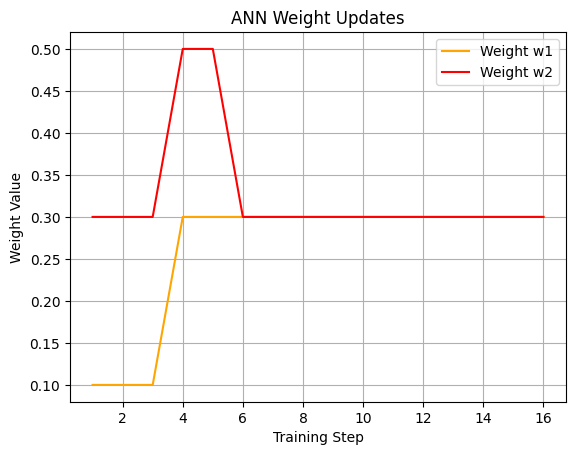


Final Result Table:

 Step  Predicted Y  Actual Y  Final w1  Final w2
    1            0         0       0.1       0.3
    2            0         0       0.1       0.3
    3            0         0       0.1       0.3
    4            0         1       0.3       0.5
    5            0         0       0.3       0.5
    6            1         0       0.3       0.3
    7            0         0       0.3       0.3
    8            1         1       0.3       0.3
    9            0         0       0.3       0.3
   10            0         0       0.3       0.3
   11            0         0       0.3       0.3
   12            1         1       0.3       0.3
   13            0         0       0.3       0.3
   14            0         0       0.3       0.3
   15            0         0       0.3       0.3
   16            1         1       0.3       0.3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from scipy.stats import zscore
from google.colab import files
files.upload()
# Step 1: Load CSV Data
df = pd.read_csv("supervised_learning_table17_1.csv")
print("Step 1: Loaded Data from CSV (All Rows)\n", df.to_string(index=False))

# Step 2a: Handling Missing Values (Univariate)
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)

# Step 2a: Handling Missing Values (Bivariate)
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
group_missing = df[df['Z'].isnull()].groupby(['X1', 'X2']).size().unstack(fill_value=0)
print("Conditional missing count of 'Z':")
print(group_missing)

# Step 2b: Outlier Detection and Handling (Univariate Z-Score)
print("\nStep 2b: Outlier Detection with Z-score (Univariate)")
columns_to_check = ['X1', 'X2', 'Z']
z_scores_np = np.abs(zscore(df[columns_to_check]))

for i, col in enumerate(columns_to_check):
    outliers = z_scores_np[:, i] > 3
    if outliers.any():
        print(f"Outliers detected in {col} at rows: {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()
    else:
        print(f"No significant outliers found in {col}.")

# Step 2c: Scaling, Normalization, and Transformation
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")

# StandardScaler
scaler = StandardScaler()
std_scaled = scaler.fit_transform(df[columns_to_check])
df[['X1_std', 'X2_std', 'Z_std']] = std_scaled

# MinMaxScaler
minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df[columns_to_check])
df[['X1_mm', 'X2_mm', 'Z_mm']] = mm_scaled

# PowerTransformer
pt = PowerTransformer()
pt_scaled = pt.fit_transform(df[columns_to_check])
df[['X1_pt', 'X2_pt', 'Z_pt']] = pt_scaled

print(df[['X1', 'X2', 'Z',
          'X1_std', 'X2_std', 'Z_std',
          'X1_mm', 'X2_mm', 'Z_mm',
          'X1_pt', 'X2_pt', 'Z_pt']].to_string(index=False))

# Step 3: Correlation Matrix (Bivariate Analysis)
print("\nStep 3: Bivariate Correlation Matrix")
correlation = df[columns_to_check].corr()
print(correlation)

# Step 4: ANN Logic (Step-by-Step Perceptron)
print("\nStep 4: ANN Step-by-Step Updates\n")
alpha = 0.2
threshold = 0.5
w1, w2 = 0.1, 0.3

steps, outputs, weights_w1, weights_w2 = [], [], [], []

for i in range(len(df)):
    x1 = df.loc[i, 'X1']
    x2 = df.loc[i, 'X2']
    y = df.loc[i, 'Y']

    net = x1 * w1 + x2 * w2
    y_pred = 1 if net >= threshold else 0
    error = y - y_pred

    print(f"Step {i+1}: x1={x1}, x2={x2}, y={y}, net={net:.2f}, pred={y_pred}, error={error}")
    print(f"  Before update: w1={w1:.2f}, w2={w2:.2f}")

    w1 = w1 + alpha * error * x1
    w2 = w2 + alpha * error * x2

    print(f"  After update:  w1={w1:.2f}, w2={w2:.2f}\n")

    steps.append(i + 1)
    outputs.append(y_pred)
    weights_w1.append(round(w1, 2))
    weights_w2.append(round(w2, 2))

# Step 5: Plot weight updates
plt.plot(steps, weights_w1, label='Weight w1', color='orange')
plt.plot(steps, weights_w2, label='Weight w2', color='red')
plt.xlabel("Training Step")
plt.ylabel("Weight Value")
plt.title("ANN Weight Updates")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Final Result Table
result_df = pd.DataFrame({
    "Step": steps,
    "Predicted Y": outputs,
    "Actual Y": df['Y'],
    "Final w1": weights_w1,
    "Final w2": weights_w2
})

print("\nFinal Result Table:\n")
print(result_df.to_string(index=False))